In [2]:
import sys
sys.path

['',
 '/home/vaisakh/anaconda3/lib/python36.zip',
 '/home/vaisakh/anaconda3/lib/python3.6',
 '/home/vaisakh/anaconda3/lib/python3.6/lib-dynload',
 '/home/vaisakh/anaconda3/lib/python3.6/site-packages',
 '/home/vaisakh/anaconda3/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg',
 '/home/vaisakh/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/vaisakh/.ipython']

In [38]:
x = np.stack([np.linspace(0, 1, 100)]*2)
x = np.reshape(np.meshgrid(x[0], x[1]), (2, -1)).T

def act(x, b):
    a = np.copy(x)
    a[x <= b] = 0
    return a

def bern(size=1):
    z = np.ones(size)
    p = np.random.uniform(size=size)
    z[p>0.5] = -1
    return z

def dense(prev_layer, num_neurons):
    prev_neurons = prev_layer.shape[1]
    b = np.random.random(num_neurons)
    w = bern((prev_neurons, num_neurons))
    y = prev_layer.dot(w)
    for i in range(num_neurons):
        y[:, i] = act(y[:, i], b[i])
        
    return y

def input_layer(_input):
    x = np.copy(_input)
    for i in range(x.shape[1]):
        x[:, i] = act(x[:, i], np.random.random())
        
    return x

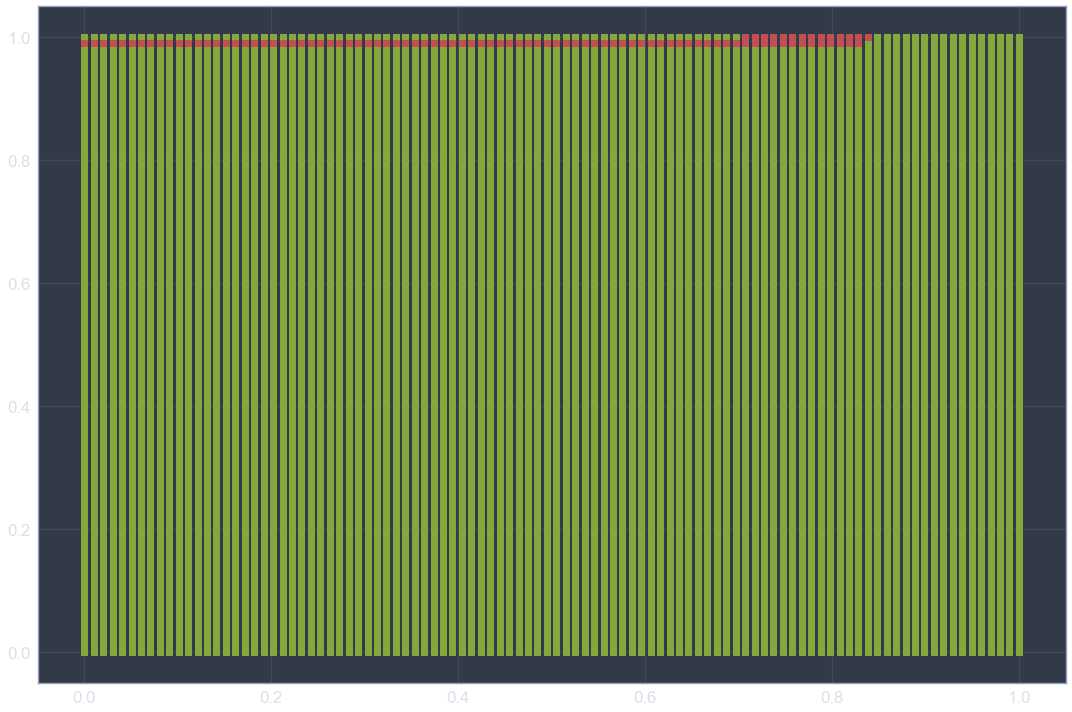

In [239]:
y = dense(input_layer(x), 100)
y = dense(y, 50)
y = dense(y, 10)
y = dense(y, 1).reshape(-1)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], 'sg')
plt.plot(x[:, 0][y>0], x[:, 1][y>0], 'sr')
plt.show()
assert np.where(y<0)[0].size == 0

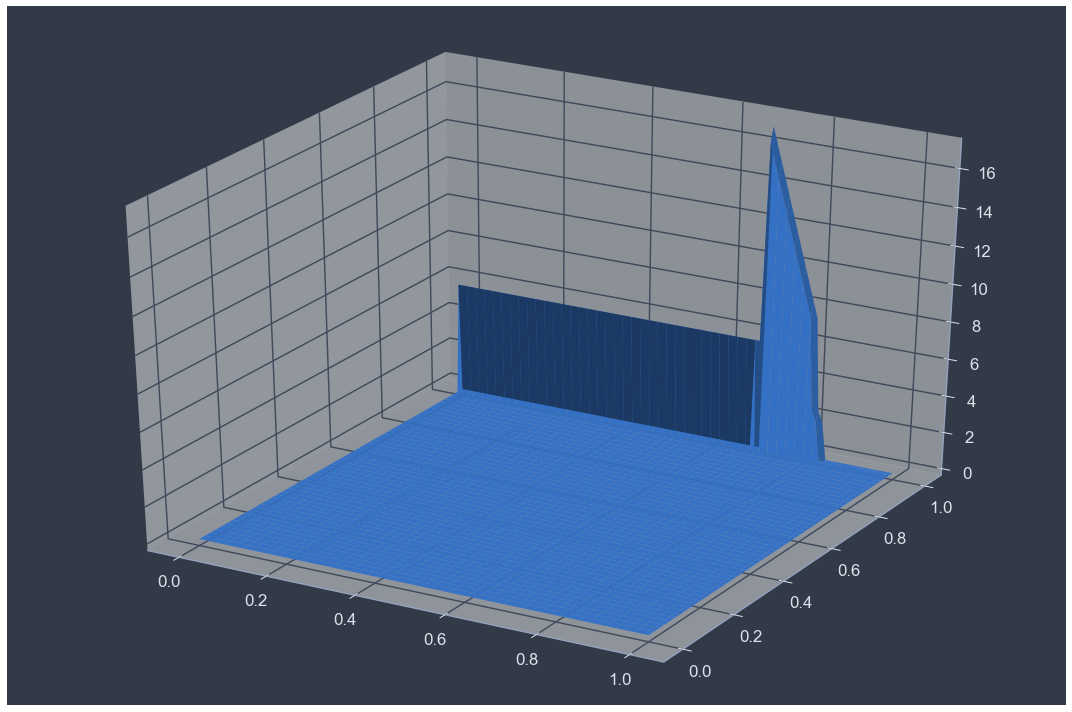

In [240]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(x[:, 0].reshape((100, 100)), x[:, 1].reshape((100, 100)), y.reshape((100, 100)))
plt.show()